In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


# import visual_behavior.data_access.loading as loading # Files should be saved in a clear location
# import visual_behavior.data_access.utilities as utilities
import visual_behavior.visualization.utils as utils

import seaborn as sns
import jetplot
import matplotlib.colors
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 1})

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from visual_behavior.dimensionality_reduction.clustering import plotting # functions to plot clusters
from visual_behavior.dimensionality_reduction.clustering import processing # function for computing and validating clusters

import visual_behavior.visualization.ophys.platform_paper_figures as ppf

In [4]:
import visual_behavior_glm.GLM_fit_dev as gfd
import visual_behavior_glm.GLM_analysis_tools as gat
import visual_behavior_glm.GLM_across_session as gas

# Cell ID shuffle control

## Supplemental figure 20

#### Load data

In [ ]:
experience_level_colors = utils.get_experience_level_colors()
cre_line_colors = utils.get_cre_line_colors()

experience_levels = utils.get_new_experience_levels()
cell_types = utils.get_cell_types()

In [6]:
# path to data file
path = r'C:\Users\iryna.yavorska\Documents\github\visual_behavior_platform_paper\data_cache'
base_path = os.path.abspath(path)

In [9]:
# create folder to load and save to
folder = 'cluster_controls'
save_dir = os.path.join(base_path, folder)


In [10]:
# get GLM output, filter and reshape
glm_version = '24_events_all_L2_optimize_by_session'


#### Load original feature matrix, meta data and cluster labels

In [12]:
filename = 'feature_matrix.h5'
feature_matrix = pd.read_hdf(os.path.join(save_dir, filename), key='df')

In [18]:
filename = 'cluster_meta_14_clusters.h5'
cluster_meta = pd.read_hdf(os.path.join(save_dir, filename))
cluster_meta.head()

,cluster_id,labels,ophys_experiment_id,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,...,layer,area_layer,date,first_novel,n_relative_to_first_novel,last_familiar,last_familiar_active,second_novel,second_novel_active,experience_exposure
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
1086489847,9,0,1003771765,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,486737,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,192.0,...,upper,VISp_upper,20200129,False,-2.0,False,True,False,False,Familiar > 3
1086489860,2,4,1003771765,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,486737,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,192.0,...,upper,VISp_upper,20200129,False,-2.0,False,True,False,False,Familiar > 3
1086489891,9,0,1003771765,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,486737,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,192.0,...,upper,VISp_upper,20200129,False,-2.0,False,True,False,False,Familiar > 3
1086489976,4,9,962471831,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467302,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,177.0,...,lower,VISp_lower,20191007,False,-1.0,True,True,False,False,Familiar 3
1086490002,4,9,962471831,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467302,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,177.0,...,lower,VISp_lower,20191007,False,-1.0,True,True,False,False,Familiar 3


In [19]:
original_mean_dropout_scores = processing.get_mean_dropout_scores_per_cluster(feature_matrix, 
                                                  cluster_df = cluster_meta.reset_index(), sort=True)

In [22]:
len(feature_matrix)

3921

In [24]:
# split cell specimen ids by cre lines
cre_ids = {}
cre_lines = np.sort(cluster_meta.cre_line.unique())
for cre_line in cre_lines:
    cre_ids[cre_line]=cluster_meta[cluster_meta.cre_line==cre_line].index.values
    

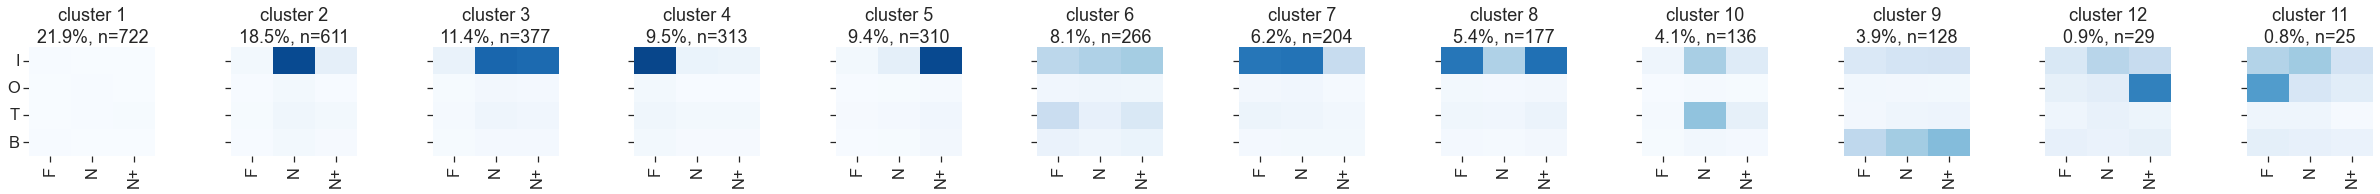

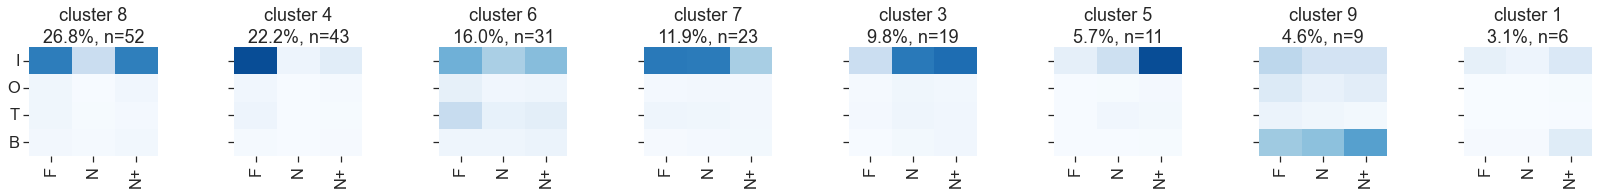

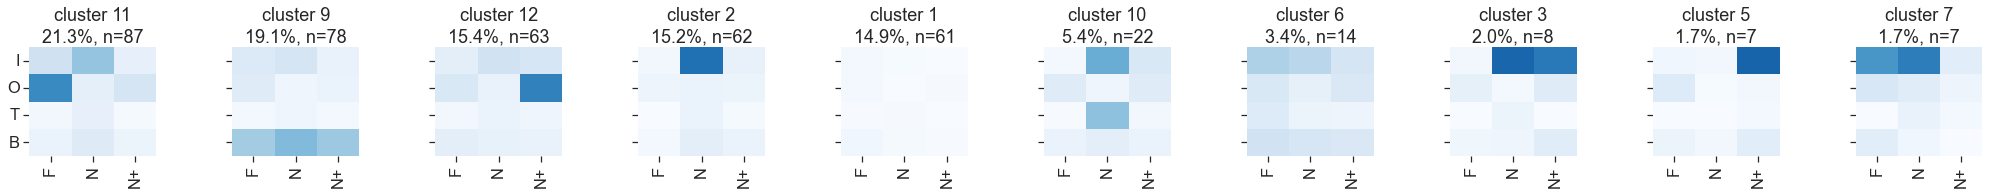

In [27]:

for cre_line in cre_lines:
    feature_matrix_cre = feature_matrix.loc[cre_ids[cre_line]]
    cluster_meta_cre = cluster_meta[cluster_meta.cre_line == cre_line]
    sort_order = {cre_line: processing.get_sorted_cluster_ids(cluster_meta_cre)}
    plotting.plot_clusters_row(cluster_meta_cre, feature_matrix_cre, cre_line,
                               sort_order=sort_order, save_dir=None, folder='', suffix='_original',)

#### Load shuffled data

In [29]:
shuffle_dir = os.path.join(save_dir, 'shuffled_files')
n_boots=np.arange(500)
shuffle_type = 'experience'
nb_shuffled = {}
for n_boot in n_boots:
    nb_filename ='all_cells_{}_nb{}.h5'.format(shuffle_type, n_boot)
    nb_shuffled[n_boot] = pd.read_hdf(os.path.join(shuffle_dir,nb_filename), key = 'df')
shuffled_feature_matrices = nb_shuffled

In [31]:
# to create new shuffled data:
shuffled_matrix_example = processing.shuffle_dropout_score(feature_matrix, shuffle_type='experience', separate_cre_lines=False)

shuffling data across experience fully (cell id and experience level)


C:\Users\iryna.yavorska\Anaconda3\envs\vba\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


#### Cluster shuffled data

#### Load cluster labels

In [ ]:
%%time
## Load shuffled cluster labels

shuffle_type_labels = {}
for shuffle_type in shuffle_types:
    nb_labels_shuffled = {}                       
    for n, n_boot in enumerate(n_boots):
        nb_filename ='all_cells_{}_nb{}_cluster_labels.h5'.format(shuffle_type, n_boot) 
        full_filename = os.path.join(filedir, nb_filename)
        nb_labels_shuffled[n] = pd.read_hdf(full_filename, key = 'clustered_df')
    shuffle_type_labels[shuffle_type] = nb_labels_shuffled

### panel c and d - SSE matching heatmap 
change color of cluster heatmap

## panels e and f probability of clusters in shuffled data

# Familiar control

## Supplemental figure 24

### panel b and c - coclustering matrix

### panel d and f - cluster heatmaps

In [ ]:
### panel e - distribution 

#### Coclustering matrix